In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("../data/df_august.csv")

In [4]:
df.drop("city", inplace=True, axis=1)

### We have 320,805 entries in the data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320805 entries, 0 to 320804
Data columns (total 23 columns):
bar_id                          320805 non-null int64
order_id                        320805 non-null int64
order_time                      320805 non-null object
order_item_id                   320805 non-null int64
title                           320805 non-null object
category_id                     319148 non-null float64
beer_brand_id                   320805 non-null int64
beer_serving_type_id            320805 non-null int64
beer_volume                     320804 non-null float64
item_qty                        320805 non-null float64
sales_before_tax                320805 non-null float64
sales_inc_tax                   320805 non-null float64
guest_count                     320805 non-null int64
timezone                        320805 non-null object
bar_type_id                     320805 non-null int64
bar_type                        302498 non-null object
total_order

### We have a total of 69,143 different table orders inside Toronto

In [44]:
len(df["order_id"].value_counts())

69143

### What is the avg number of items per table order?

In [46]:
df.groupby("order_id").count()["total_orders"].mean()

4.639732149313741

### Looks like we have a long tail of total order values

In [73]:
total_orders = df.groupby("order_id")["total_orders"].size()

In [76]:
total_orders.value_counts()

2      13793
3      11126
1       9593
4       9550
5       6333
6       4997
7       3411
8       2512
9       1746
10      1306
11       986
12       740
13       540
14       452
15       349
16       300
17       224
18       193
20       142
19       141
22        87
21        83
24        81
23        70
25        52
26        48
27        36
28        36
29        20
31        20
       ...  
90         2
66         2
70         1
74         1
67         1
205        1
69         1
72         1
132        1
63         1
145        1
83         1
58         1
56         1
54         1
117        1
179        1
51         1
114        1
49         1
112        1
172        1
170        1
95         1
93         1
126        1
152        1
88         1
86         1
92         1
Name: total_orders, Length: 86, dtype: int64

In [77]:
sns.set(style="whitegrid")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


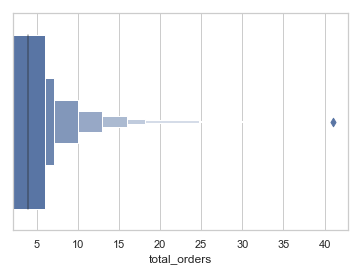

In [79]:
sns.boxenplot(x=total_orders[:1000])

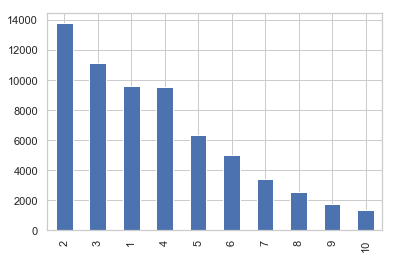

In [93]:
total_orders.value_counts()[:10].plot.bar()

### Looks like most table orders are made up of two item orders.. interesting. Does this mean most of these orders are done by one person or two people?

In [95]:
total_orders.value_counts()[:5]

2    13793
3    11126
1     9593
4     9550
5     6333
Name: total_orders, dtype: int64

### Insights - mapping from category ids to items:
1. beer
2. food
3. liquer and alcohol
4. soft drinks
5. side dishes
6. cocktails and wine

### How many bars are we talking about?

In [17]:
df["bar_id"].count()

320805

### what is the distribution between these bars per order_ids?

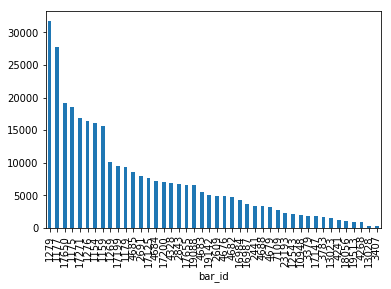

In [36]:
df.groupby(["bar_id"]).count()["order_id"].sort_values(ascending=False).plot.bar()

### looks like there are disparities in terms of data (orders) we get per bar. Should we use all bars?

In [38]:
len(df["bar_id"].value_counts())  #there are 44 different bars in Toronto

44

## How many Null values do we have in the data?

In [39]:
df.isnull().sum()

bar_id                              0
order_id                            0
order_time                          0
order_item_id                       0
title                               0
category_id                      1657
beer_brand_id                       0
beer_serving_type_id                0
beer_volume                         1
item_qty                            0
sales_before_tax                    0
sales_inc_tax                       0
guest_count                         0
timezone                            0
bar_type_id                         0
bar_type                        18307
total_orders                        0
total_orders_category_id_1.0        0
total_orders_category_id_2.0        0
total_orders_category_id_3.0        0
total_orders_category_id_4.0        0
total_orders_category_id_5.0        0
total_orders_category_id_6.0        0
dtype: int64

In [97]:
## Back to total orders

### lets look at total orders of 2s and 3s and 1s

In [5]:
small_to = df[(df.total_orders == 2)]

In [ ]:
### Almost 50% of orders 

In [6]:
small_to["category_id"].value_counts()

2.0    12882
1.0     6456
3.0     4059
4.0     2570
6.0      906
5.0      612
Name: category_id, dtype: int64

In [12]:
small_to.columns

Index(['Unnamed: 0', 'bar_id', 'order_id', 'order_time', 'order_item_id',
       'title', 'category_id', 'beer_brand_id', 'beer_serving_type_id',
       'beer_volume', 'item_qty', 'sales_before_tax', 'sales_inc_tax',
       'guest_count', 'timezone', 'bar_type_id', 'bar_type', 'total_orders',
       'total_orders_category_id_1.0', 'total_orders_category_id_2.0',
       'total_orders_category_id_3.0', 'total_orders_category_id_4.0',
       'total_orders_category_id_5.0', 'total_orders_category_id_6.0'],
      dtype='object')

In [40]:
small_to["category_id"] = small_to.category_id.apply(lambda x: str(x))

/Users/danielastepanov/miniconda3/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
small_to.groupby(["order_id", "category_id"]).count().reset_index()["category_id"].value_counts(normalize=True)

2.0    0.451559
1.0    0.217781
3.0    0.147387
4.0    0.116153
6.0    0.035221
5.0    0.027579
nan    0.004320
Name: category_id, dtype: float64

### Seems like almost 50% of ordered items are food items, them 20% are beers, and 15% are hard liquer.

## Lets see the numbers for orders with 3 and 1 total

In [47]:
small_to = df[(df.total_orders == 1)]
small_to["category_id"] = small_to.category_id.apply(lambda x: str(x))
small_to.groupby(["order_id", "category_id"]).count().reset_index()["category_id"].value_counts(normalize=True)

/Users/danielastepanov/miniconda3/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


2.0    0.502971
1.0    0.261441
3.0    0.141562
4.0    0.042531
6.0    0.038778
5.0    0.008652
nan    0.004065
Name: category_id, dtype: float64

In [48]:
small_to = df[(df.total_orders == 3)]
small_to["category_id"] = small_to.category_id.apply(lambda x: str(x))
small_to.groupby(["order_id", "category_id"]).count().reset_index()["category_id"].value_counts(normalize=True)

/Users/danielastepanov/miniconda3/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


2.0    0.436434
1.0    0.199942
3.0    0.146631
4.0    0.137457
6.0    0.037510
5.0    0.036550
nan    0.005475
Name: category_id, dtype: float64